In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df.head()

,rating,content
0,1.0,언제나 사람 많은 동대문에 에어컨도 잘 되어 있고.. 그런데 길찾기 넘 힘들고^^;...
1,4.0,굿
2,2.0,ㅡ
3,1.0,주차 30분에 3000원
4,3.0,ㅇㅇ


In [4]:
df.shape

(814, 2)

In [5]:
# 결측지
df.isnull().sum()

rating     12
content    16
dtype: int64

In [6]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   802 non-null    float64
 1   content  798 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [7]:
# text 변수 확인

df['content'][0]

'언제나 사람 많은 동대문에 에어컨도 잘 되어 있고.. 그런데 길찾기 넘 힘들고^^;\n주차는 그럭저럭.. 엘베 타고 옥외주차 해야되서 큰차는 주차할때 살짝 겁남.. 땡볕주차라 다시 타고 나올때 개덥..! 주차비도 비쌈 ㅠㅠ 구입해도 주차할인은 없음'

In [8]:
df['content'][100]

'좋와요'

In [9]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [10]:
df['content'][0]

'언제나 사람 많은 동대문에 에어컨도 잘 되어 있고.. 그런데 길찾기 넘 힘들고^^;\n주차는 그럭저럭.. 엘베 타고 옥외주차 해야되서 큰차는 주차할때 살짝 겁남.. 땡볕주차라 다시 타고 나올때 개덥..! 주차비도 비쌈 ㅠㅠ 구입해도 주차할인은 없음'

In [11]:
apply_regular_expression(df['content'][0])

'언제나 사람 많은 동대문에 에어컨도 잘 되어 있고 그런데 길찾기 넘 힘들고주차는 그럭저럭 엘베 타고 옥외주차 해야되서 큰차는 주차할때 살짝 겁남 땡볕주차라 다시 타고 나올때 개덥 주차비도 비쌈 ㅠㅠ 구입해도 주차할인은 없음'

In [12]:
from konlpy.tag import Okt
from collections import Counter

In [13]:
apply_regular_expression(df['content'][0])

'언제나 사람 많은 동대문에 에어컨도 잘 되어 있고 그런데 길찾기 넘 힘들고주차는 그럭저럭 엘베 타고 옥외주차 해야되서 큰차는 주차할때 살짝 겁남 땡볕주차라 다시 타고 나올때 개덥 주차비도 비쌈 ㅠㅠ 구입해도 주차할인은 없음'

In [14]:
from konlpy.tag import Okt
# zulu - macOS/arm64/version15 설치 이후.
# 해당 path를 지정.
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java'

In [15]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['content'][0]))
nouns

['사람',
 '동대문',
 '에어컨',
 '길찾기',
 '주차',
 '엘베',
 '타고',
 '옥외',
 '주차',
 '주차',
 '때',
 '살짝',
 '땡볕',
 '주차',
 '다시',
 '타고',
 '때',
 '개',
 '주차',
 '비도',
 '구입',
 '주차',
 '할인']

In [16]:
# 말뭉치 생성
corpus = "".join(df['content'].astype(str).tolist())
corpus

'언제나 사람 많은 동대문에 에어컨도 잘 되어 있고.. 그런데 길찾기 넘 힘들고^^;\n주차는 그럭저럭.. 엘베 타고 옥외주차 해야되서 큰차는 주차할때 살짝 겁남.. 땡볕주차라 다시 타고 나올때 개덥..! 주차비도 비쌈 ㅠㅠ 구입해도 주차할인은 없음굿ㅡ주차 30분에 3000원ㅇㅇ??????????ㅋㅋㅋ굳느림자주방문 좋아요주차비가 넘 비싸요ㅠ좋아요 굿굿좋아요주차요금이 2시간41분에 12000원 참고하세요.\n주차장 입구가 많이 협소합니다. 조심하세요.굿동대문조어영ㅎㅎ굿굿굿주차장넓어요굿좋아요굿주차비가 후덜덜주차장 편해요굿굿굿주차장 좋아요\n하지만 주차비가 비싸용좋아요가성비 굿굿ㅇㅇ굿굿좋아요 굿붇굿굿굳굿주차비가 비싸요굿시장주차장으로 딱좋아요 굿주차요금 ㅠ굿굿굿굿좋아요 좋아요 굿제발 일주차 제도 좀..굿동대문 종합시장 .필요한 물건이 곳곳에 있어 발견하는 재미.주차비 비싸지만 쾌적해요맛있어요굿좋아요 굿.굳좋아요친절비싸요악세사리 재료 구매하러 가끔 가는데 왠만한 재료는 다 있는것 같아 한곳에서 구매하기 좋아요좋아요10분에 주차비 천원이에요예복맞추러갑니다Good좋아요ㅠㅠ주차장 너무깊엉77좋아요옥상주차장좋아요굿주차비 비싸다넓고좋아요굿경차 할인되는줄 알았는데 계산할때 안되네요ㅜㅜ 몰랐던건지 아쉬워요좋아요동대문 이용시 편리해서 좋아여~~굳굳굳재밌어요친절해요친절해요좋아요좋와요좋와요넓고 다양해서 좋아요좋와요굿실에대해 자세한 설명과 넘넘 친절하셔서 감사합니다^^주차장은 뺑~ 돌아야있어요.좋와요좋와요좋와요좋와요좋와요굿좋아요좋아요좋아요nan저렴하고좋아요굳??ㅎ좋아요굿좋어요긋주차비가  너무  비싸다최고의 물건리본전문좋아요굿좋아요좋아요좋아요좋지요ㅁㄴㅇ굳앵글이~~~\n앵글이 득템~~^^ㅈㅇ좋아요좋아요좋아요~추천합니다좋아요굿굿굿굿굿nan좋아요.\n필요한거 사러 들렸어요굿^^좋아요ㅇㅇ좋아요좋아요비즈 마스크줄 예뻐요좋아요항상 잘 이용하고 있습니다누이네\n육회\n낚지탕탕깔끔하고 좋습니다.좋아요좋아요좋아요좋아요굿천원단주문이요ㅎ굿ㄱ좋아요친절해요! 좋아요! 최고에여ㅎㅎ굿5층 아메리칸퀼트\n이쁜 조각원단

In [17]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'언제나 사람 많은 동대문에 에어컨도 잘 되어 있고 그런데 길찾기 넘 힘들고주차는 그럭저럭 엘베 타고 옥외주차 해야되서 큰차는 주차할때 살짝 겁남 땡볕주차라 다시 타고 나올때 개덥 주차비도 비쌈 ㅠㅠ 구입해도 주차할인은 없음굿ㅡ주차 분에 원ㅇㅇㅋㅋㅋ굳느림자주방문 좋아요주차비가 넘 비싸요ㅠ좋아요 굿굿좋아요주차요금이 시간분에 원 참고하세요주차장 입구가 많이 협소합니다 조심하세요굿동대문조어영ㅎㅎ굿굿굿주차장넓어요굿좋아요굿주차비가 후덜덜주차장 편해요굿굿굿주차장 좋아요하지만 주차비가 비싸용좋아요가성비 굿굿ㅇㅇ굿굿좋아요 굿붇굿굿굳굿주차비가 비싸요굿시장주차장으로 딱좋아요 굿주차요금 ㅠ굿굿굿굿좋아요 좋아요 굿제발 일주차 제도 좀굿동대문 종합시장 필요한 물건이 곳곳에 있어 발견하는 재미주차비 비싸지만 쾌적해요맛있어요굿좋아요 굿굳좋아요친절비싸요악세사리 재료 구매하러 가끔 가는데 왠만한 재료는 다 있는것 같아 한곳에서 구매하기 좋아요좋아요분에 주차비 천원이에요예복맞추러갑니다좋아요ㅠㅠ주차장 너무깊엉좋아요옥상주차장좋아요굿주차비 비싸다넓고좋아요굿경차 할인되는줄 알았는데 계산할때 안되네요ㅜㅜ 몰랐던건지 아쉬워요좋아요동대문 이용시 편리해서 좋아여굳굳굳재밌어요친절해요친절해요좋아요좋와요좋와요넓고 다양해서 좋아요좋와요굿실에대해 자세한 설명과 넘넘 친절하셔서 감사합니다주차장은 뺑 돌아야있어요좋와요좋와요좋와요좋와요좋와요굿좋아요좋아요좋아요저렴하고좋아요굳ㅎ좋아요굿좋어요긋주차비가  너무  비싸다최고의 물건리본전문좋아요굿좋아요좋아요좋아요좋지요ㅁㄴㅇ굳앵글이앵글이 득템ㅈㅇ좋아요좋아요좋아요추천합니다좋아요굿굿굿굿굿좋아요필요한거 사러 들렸어요굿좋아요ㅇㅇ좋아요좋아요비즈 마스크줄 예뻐요좋아요항상 잘 이용하고 있습니다누이네육회낚지탕탕깔끔하고 좋습니다좋아요좋아요좋아요좋아요굿천원단주문이요ㅎ굿ㄱ좋아요친절해요 좋아요 최고에여ㅎㅎ굿층 아메리칸퀼트이쁜 조각원단들이 있어요부자재 쇼핑천국악세사리 좋아용 이뻐요동대문은 별천지늘 제자리에 묵묵히 재료들을 공급해줍니다공예재료  젛음악세사리전문매장복잡하지만 꿀템을 얻는곳사장님부부 너무 친절해

In [18]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['사람', '동대문', '에어컨', '길찾기', '주차', '엘베', '타고', '옥외', '주차', '주차', '때', '살짝', '땡볕', '주차', '다시', '타고', '때', '개', '주차', '비도', '구입', '주차', '할인', '굿', '주차', '분', '원', '림', '자주', '방문', '차비', '굿굿', '주차', '요금', '시간', '원', '참고', '주차장', '입구', '협소합니', '굿', '동대문', '조어', '영', '굿굿굿', '주차장', '굿', '굿', '차비', '후', '덜덜', '주차장', '굿굿굿', '주차장', '차비', '요가', '성비', '굿굿', '굿굿', '굿', '붇굿굿굳', '굿', '주차', '비', '굿', '시장', '주차장', '굿', '주차', '요금', '굿굿굿굿', '굿', '제발', '주차', '제도', '좀굿', '동대문', '종합', '시장', '물건', '곳곳', '발견', '재미', '차비', '굿', '굿', '친절', '악세사리', '재료', '구매', '가끔', '재료', '곳', '구매', '분', '차비', '천원', '예복', '주차장', '옥상', '주차장', '굿', '차비', '굿', '경차', '할인', '계산', '때', '동대문', '이용', '시', '요', '요', '굿실', '대해', '설명', '주차장', '뺑', '요', '요', '요', '요', '요굿', '굿', '차비', '최고', '물건', '리본', '전문', '굿', '앵글', '앵글', '득템', '추천', '굿굿굿굿굿', '굿', '비즈', '마스크', '줄', '항상', '이용', '누', '육회', '낚', '굿', '원단', '주문', '굿', '최고', '굿층', '아메리칸', '퀼트', '원단', '요부', '자재', '쇼핑', '천국', '악세사리', '동대문', '별천지', '늘', '제자리', '재료', '공급', '재료', '젛음', '악세사리', '매장

In [19]:
# 빈도 탐색
counter = Counter(nouns)

In [20]:
counter.most_common(10)

[('굿', 70),
 ('엽전', 57),
 ('시장', 39),
 ('맛', 33),
 ('주차', 31),
 ('주차장', 25),
 ('도시락', 23),
 ('튀김', 20),
 ('떡볶이', 20),
 ('통인시장', 19)]

In [21]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('엽전', 57),
 ('시장', 39),
 ('주차', 31),
 ('주차장', 25),
 ('도시락', 23),
 ('튀김', 20),
 ('떡볶이', 20),
 ('통인시장', 19),
 ('아이', 16),
 ('사람', 14)]

In [28]:
# stopwords = pd.read_csv("tongin.csv").values.tolist()
# stopwords[:10]
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [30]:
# ///////////////////////

# 불용어 사전에 추가
jeju_hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in jeju_hotel_stopwords:
    stopwords.append(word)

In [31]:
df['content'] = df['content'].fillna('')  # 결측값을 빈 문자열로 대체

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['content'].tolist())
word_list = vect.get_feature_names_out()  # get_feature_names 대신 get_feature_names_out 사용
count_list = bow_vect.toarray().sum(axis=0)

In [33]:
# 단어 리스트
word_list

array(['가게', '가격', '가기', '가끔', '가득', '가면', '가방', '가성', '가세', '가안', '가요',
       '가이드', '가족', '가지', '간식', '간장', '갈치', '감사', '강츄', '개선', '개천', '거기',
       '거리', '거의', '거지', '건물', '건어물', '걸이', '결제', '경도', '경차', '경험', '계곡',
       '계산', '계속', '고객', '고기', '고추', '고추퀴김', '곳곳', '공간', '공급', '공영', '공예',
       '과거', '과일', '관광객', '관광지', '괜찬앙', '교환', '구경', '구매', '구이', '구입',
       '국산', '국수', '굳이', '굿굿', '굿굿굿', '규모', '그냥', '근처', '금성', '기념품', '기름',
       '기분', '길찾기', '김말이', '김밥', '김치부침개', '까페', '깻잎', '껍질', '꼬마', '꿀템',
       '나들이', '나머지', '나용', '나이', '나중', '낙후', '난리', '남자친구', '납득', '내면',
       '내용', '냄새', '냉동', '노가리', '농활', '느것', '느낌', '다른', '다만', '다시', '다음',
       '달걀', '닭강정', '닭꼬치', '당황', '대비', '대요', '대체로', '대포', '대해', '대형',
       '덕분', '덜덜', '데이트', '도둑', '도시락', '돈가스', '동네', '동대문', '동시', '동전',
       '두부', '득템', '등등', '등심', '따리', '딸기', '때문', '땡볕', '떡볶기', '떡볶이', '떡뽘',
       '뚝뚝', '런치먹', '렵니', '령해', '로만', '리본', '마늘', '마란', '마랑', '마쉬멜로우',
       '마스크', '마약', '마음', '마차', '마트', '막걸리', '만두', '만원'

In [34]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 6,  9,  2,  1,  2,  3,  1,  9,  1,  1,  3,  1,  1,  2,  1,  1,  1,
        1,  1,  2,  1,  1,  3,  1,  2,  1,  1,  2,  3,  1,  1, 11,  1,  2,
        2,  1,  1,  5,  1,  1,  2,  1,  1,  1,  2,  9,  1,  2,  1,  3,  7,
       11,  1,  4,  1,  1,  1,  3,  1,  1,  8,  1,  1,  1,  8,  4,  1,  2,
        9,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       10,  2,  1,  1,  1,  1,  1,  1,  2,  4,  2,  1,  4,  8,  1,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  1, 23,  2,  1,  7,  9,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1, 20,  1,  1,  1,  1,  1,  3,  2,  2,  1,  1,
        1,  1,  1,  1,  2,  2,  4,  3,  5,  2,  3,  1,  1,  1,  3, 16,  1,
        1,  1,  1,  3,  1,  8,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  5,  1,  1,  1,  1,  2,  5,
        1,  1,  1,  1,  4,  2,  1,  1,  1,  6,  1,  1,  2,  5,  1,  3,  1,
       11,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  2,  1,  1,  1,  2,
        1, 14,  1,  1,  1

In [35]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
bow_vect.shape

(814, 524)

In [37]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 6,
 '가격': 9,
 '가기': 2,
 '가끔': 1,
 '가득': 2,
 '가면': 3,
 '가방': 1,
 '가성': 9,
 '가세': 1,
 '가안': 1,
 '가요': 3,
 '가이드': 1,
 '가족': 1,
 '가지': 2,
 '간식': 1,
 '간장': 1,
 '갈치': 1,
 '감사': 1,
 '강츄': 1,
 '개선': 2,
 '개천': 1,
 '거기': 1,
 '거리': 3,
 '거의': 1,
 '거지': 2,
 '건물': 1,
 '건어물': 1,
 '걸이': 2,
 '결제': 3,
 '경도': 1,
 '경차': 1,
 '경험': 11,
 '계곡': 1,
 '계산': 2,
 '계속': 2,
 '고객': 1,
 '고기': 1,
 '고추': 5,
 '고추퀴김': 1,
 '곳곳': 1,
 '공간': 2,
 '공급': 1,
 '공영': 1,
 '공예': 1,
 '과거': 2,
 '과일': 9,
 '관광객': 1,
 '관광지': 2,
 '괜찬앙': 1,
 '교환': 3,
 '구경': 7,
 '구매': 11,
 '구이': 1,
 '구입': 4,
 '국산': 1,
 '국수': 1,
 '굳이': 1,
 '굿굿': 3,
 '굿굿굿': 1,
 '규모': 1,
 '그냥': 8,
 '근처': 1,
 '금성': 1,
 '기념품': 1,
 '기름': 8,
 '기분': 4,
 '길찾기': 1,
 '김말이': 2,
 '김밥': 9,
 '김치부침개': 1,
 '까페': 1,
 '깻잎': 2,
 '껍질': 1,
 '꼬마': 1,
 '꿀템': 1,
 '나들이': 2,
 '나머지': 1,
 '나용': 1,
 '나이': 1,
 '나중': 1,
 '낙후': 1,
 '난리': 1,
 '남자친구': 1,
 '납득': 1,
 '내면': 1,
 '내용': 10,
 '냄새': 2,
 '냉동': 1,
 '노가리': 1,
 '농활': 1,
 '느것': 1,
 '느낌': 1,
 '다른': 1,
 '다만': 2,
 '다시': 4,
 '다음': 2,
 '달걀': 1,
 '닭강정': 

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [39]:
print(tf_idf_vect.shape)

(814, 524)


In [40]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 508)	0.1507116752408808
  (0, 474)	0.36701198692981435
  (0, 425)	0.7244092119712571
  (0, 327)	0.18350599346490717
  (0, 304)	0.18350599346490717
  (0, 303)	0.18350599346490717
  (0, 231)	0.17289189317743722
  (0, 222)	0.13076068369128152
  (0, 216)	0.17289189317743722
  (0, 123)	0.18350599346490717
  (0, 113)	0.14721614488697393
  (0, 94)	0.1595197082677181
  (0, 66)	0.18350599346490717
  (0, 53)	0.1595197082677181


In [41]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 524)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.15951971
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350599 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.15951971 0.
  0.         0.        

In [42]:
vect.vocabulary_

{'사람': 222,
 '동대문': 113,
 '에어컨': 303,
 '길찾기': 66,
 '주차': 425,
 '엘베': 304,
 '타고': 474,
 '옥외': 327,
 '살짝': 231,
 '땡볕': 123,
 '다시': 94,
 '비도': 216,
 '구입': 53,
 '할인': 508,
 '자주': 376,
 '방문': 196,
 '차비': 444,
 '굿굿': 57,
 '요금': 333,
 '시간': 263,
 '참고': 447,
 '주차장': 426,
 '입구': 372,
 '협소합니': 513,
 '조어': 415,
 '덜덜': 107,
 '가성': 7,
 '시장': 265,
 '제발': 410,
 '제도': 409,
 '종합': 419,
 '물건': 180,
 '곳곳': 39,
 '발견': 192,
 '재미': 390,
 '친절': 468,
 '악세사리': 284,
 '재료': 389,
 '구매': 51,
 '가끔': 3,
 '천원': 453,
 '예복': 312,
 '옥상': 324,
 '경차': 30,
 '계산': 33,
 '이용': 360,
 '대해': 104,
 '설명': 244,
 '최고': 459,
 '리본': 132,
 '전문': 397,
 '앵글': 291,
 '득템': 117,
 '추천': 461,
 '비즈': 218,
 '마스크': 137,
 '항상': 510,
 '육회': 346,
 '주문': 421,
 '아메리칸': 271,
 '퀼트': 473,
 '원단': 340,
 '부자': 210,
 '쇼핑': 252,
 '천국': 452,
 '별천지': 201,
 '제자리': 412,
 '공급': 41,
 '공예': 43,
 '젛음': 408,
 '매장': 154,
 '꿀템': 74,
 '사장': 228,
 '부부': 209,
 '종류': 418,
 '정도': 404,
 '장말찬절해': 381,
 '걸이': 27,
 '몇개': 166,
 '특유': 482,
 '정리정돈': 405,
 '상품': 234,
 '장안': 384,
 '

In [43]:
# import pandas as pd

# # 기존 코드...
# vocab = vect.vocabulary_

# # DataFrame으로 변환
# df_vocab = pd.DataFrame(list(vocab.items()), columns=['word', 'index'])

# # 'rating' 컬럼 추가
# df_vocab['rating'] = ''

# # CSV 파일로 저장
# df_vocab.to_csv('vocab_dongdae.csv', index=False)


In [44]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{222: '사람', 113: '동대문', 303: '에어컨', 66: '길찾기', 425: '주차', 304: '엘베', 474: '타고', 327: '옥외', 231: '살짝'...


In [45]:
# 여기서부터 감성 분류 - logistic Regression

In [46]:
df.sample(10)

,rating,content
7,2.0,느림
635,2.0,튀김이 특히맛있으나 김밥이 별로인데 비쌈
634,4.0,좋아요!
432,4.0,굿
336,4.0,주차장이 싸서 좋아요
159,4.0,좋아요
468,3.0,.
681,3.0,엽전으로 산다는게 독특해요 재밌는데 시장이 좀 좁네요
338,4.0,좋아요
763,2.0,재미로만 할수있는정도 구매하시고 환불도 쉬워서 좋긴한데 엽전으로 사용하면 같은가격인...


<Axes: >

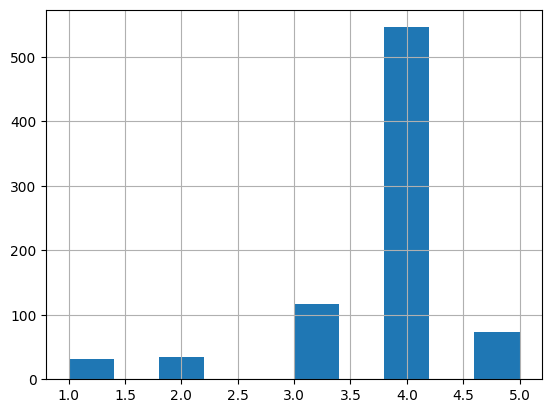

In [47]:
df['rating'].hist()

In [48]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [49]:
df.head()

,rating,content,y
0,1.0,언제나 사람 많은 동대문에 에어컨도 잘 되어 있고.. 그런데 길찾기 넘 힘들고^^;...,0
1,4.0,굿,1
2,2.0,ㅡ,0
3,1.0,주차 30분에 3000원,0
4,3.0,ㅇㅇ,0


In [50]:
df["y"].value_counts()

y
1    619
0    195
Name: count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [52]:
x_train.shape, y_train.shape

((569, 524), (569,))

In [53]:
x_test.shape, y_test.shape

((245, 524), (245,))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [55]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.78
precision: 0.77
recall: 1.00
F1: 0.87


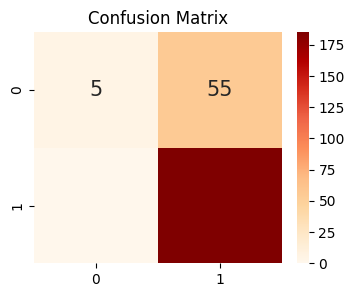

In [56]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [57]:
df['y'].value_counts()

y
1    619
0    195
Name: count, dtype: int64

In [58]:
print(df[df['y']==1].shape[0])
print(df[df['y']==0].shape[0])


619
195


In [59]:
positive_random_idx = df[df['y']==1].sample(275, replace=True, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, replace=True, random_state=12).index.tolist()


In [60]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [61]:
x_train.shape, y_train.shape

((412, 524), (412,))

In [62]:
x_test.shape, y_test.shape

((138, 524), (138,))

In [63]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [64]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.69
precision: 0.62
recall: 0.96
F1: 0.75


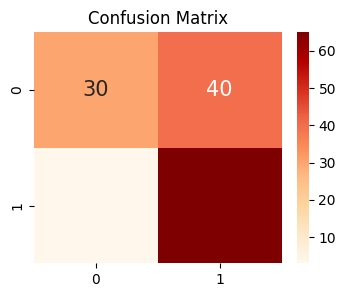

In [65]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# 긍정 / 부정 키워드 분석

In [67]:
lr2.coef_

array([[ 0.07051213, -0.43945438, -0.35796488,  0.        ,  0.        ,
         0.        ,  0.11302732,  0.36702769, -0.17447381,  0.        ,
         0.        , -0.36300923,  0.        , -0.28765313,  0.27441134,
        -0.17704764,  0.        ,  0.        ,  0.        , -0.57484641,
        -0.14122303, -0.11485074, -0.37469959, -0.17447381, -0.62901325,
         0.23725458, -0.18764154, -0.41691232, -0.0853255 ,  0.27441134,
        -0.27665928,  0.14764747,  0.        , -0.26065714,  0.        ,
         0.11302732,  0.        ,  0.        ,  0.07073247,  0.        ,
         0.1687071 ,  0.        , -0.31953551, -0.44573024, -0.11962884,
         0.65017431,  0.        , -0.37826783,  0.        , -0.30874232,
         0.27136868, -0.15920094,  0.        ,  0.31975478,  0.        ,
         0.        , -0.11485074,  0.36156271,  0.36156271, -0.38960922,
        -1.05354576, -0.14122303,  0.        ,  0.11302732, -0.7152233 ,
        -0.22411294, -0.05920091,  0.17538025, -0.4

<BarContainer object of 524 artists>

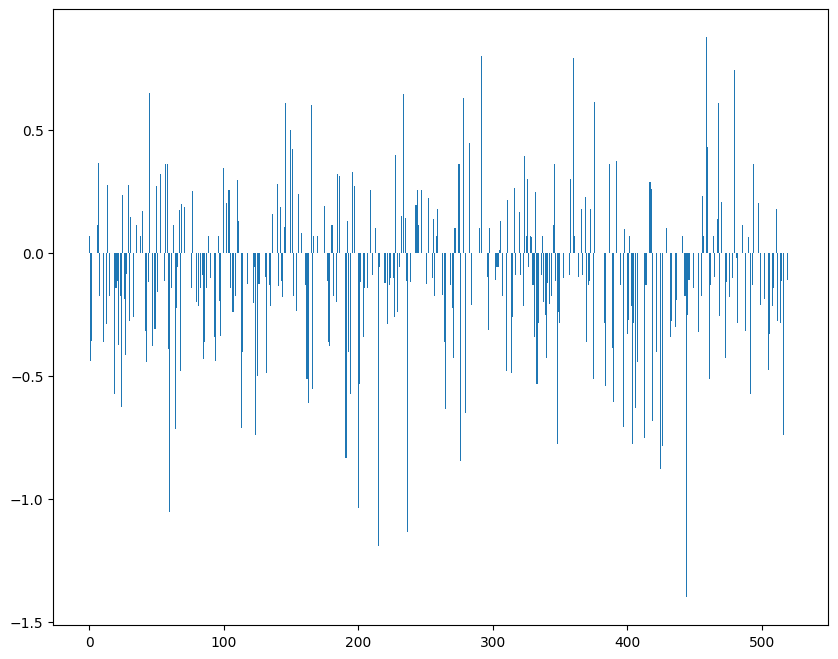

In [68]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [69]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.8775383617013593, 459), (0.802432081939854, 292), (0.7948708965817828, 360), (0.7437884838102191, 480), (0.6501743106663996, 45)]
[(-1.0370441837157816, 200), (-1.0535457605115246, 60), (-1.1365194309478601, 237), (-1.1909933760143574, 215), (-1.4014066438859556, 444)]


In [70]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(0.8775383617013593, 459),
 (0.802432081939854, 292),
 (0.7948708965817828, 360),
 (0.7437884838102191, 480),
 (0.6501743106663996, 45),
 (0.6476754436260405, 234),
 (0.6291316857545354, 278),
 (0.6139759263982203, 376),
 (0.6118416677939604, 468),
 (0.6118416677939604, 146),
 (0.6030172185904863, 165),
 (0.5022085248528495, 150),
 (0.4488645423700549, 283),
 (0.43273027159217337, 460),
 (0.42441924709329365, 151),
 (0.3991604601805514, 228),
 (0.39630956695437675, 324),
 (0.37309308327663265, 392),
 (0.36702768512970846, 7),
 (0.3615627128208886, 494),
 (0.3615627128208886, 387),
 (0.3615627128208886, 346),
 (0.3615627128208886, 275),
 (0.3615627128208886, 58),
 (0.3615627128208886, 57),
 (0.3454965208659766, 100),
 (0.33033026458988135, 196),
 (0.32086773263495993, 185),
 (0.319754779229717, 53),
 (0.312411657095669, 186),
 (0.3023270795148384, 358),
 (0.3004543848760719, 326),
 (0.2949905067788478, 110),
 (0.2881207981854204, 417),
 (0.28240236598621804, 140),
 (0.2744113359208957,

In [71]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{222: '사람',
 113: '동대문',
 303: '에어컨',
 66: '길찾기',
 425: '주차',
 304: '엘베',
 474: '타고',
 327: '옥외',
 231: '살짝',
 123: '땡볕',
 94: '다시',
 216: '비도',
 53: '구입',
 508: '할인',
 376: '자주',
 196: '방문',
 444: '차비',
 57: '굿굿',
 333: '요금',
 263: '시간',
 447: '참고',
 426: '주차장',
 372: '입구',
 513: '협소합니',
 415: '조어',
 107: '덜덜',
 7: '가성',
 265: '시장',
 410: '제발',
 409: '제도',
 419: '종합',
 180: '물건',
 39: '곳곳',
 192: '발견',
 390: '재미',
 468: '친절',
 284: '악세사리',
 389: '재료',
 51: '구매',
 3: '가끔',
 453: '천원',
 312: '예복',
 324: '옥상',
 30: '경차',
 33: '계산',
 360: '이용',
 104: '대해',
 244: '설명',
 459: '최고',
 132: '리본',
 397: '전문',
 291: '앵글',
 117: '득템',
 461: '추천',
 218: '비즈',
 137: '마스크',
 510: '항상',
 346: '육회',
 421: '주문',
 271: '아메리칸',
 473: '퀼트',
 340: '원단',
 210: '부자',
 252: '쇼핑',
 452: '천국',
 201: '별천지',
 412: '제자리',
 41: '공급',
 43: '공예',
 408: '젛음',
 154: '매장',
 74: '꿀템',
 228: '사장',
 209: '부부',
 418: '종류',
 404: '정도',
 381: '장말찬절해',
 27: '걸이',
 166: '몇개',
 482: '특유',
 405: '정리정돈',
 234: '상품',
 384: '장안',
 4

In [72]:
for coef in coef_pos_index[:60]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최고 0.8775383617013593
야채 0.802432081939854
이용 0.7948708965817828
튀김 0.7437884838102191
과일 0.6501743106663996
상품 0.6476754436260405
아이스크림 0.6291316857545354
자주 0.6139759263982203
친절 0.6118416677939604
만해 0.6118416677939604
명절 0.6030172185904863
맛집 0.5022085248528495
아쥬 0.4488645423700549
추억 0.43273027159217337
망원 0.42441924709329365
사장 0.3991604601805514
옥상 0.39630956695437675
재밋었어 0.37309308327663265
가성 0.36702768512970846
품질 0.3615627128208886
장터 0.3615627128208886
육회 0.3615627128208886
아영 0.3615627128208886
굿굿굿 0.3615627128208886
굿굿 0.3615627128208886
대비 0.3454965208659766
방문 0.33033026458988135
바로 0.32086773263495993
구입 0.319754779229717
바삭 0.312411657095669
이색 0.3023270795148384
옥수수 0.3004543848760719
도시락 0.2949905067788478
존맛 0.2881207981854204
마차 0.28240236598621804
경도 0.2744113359208957
간식 0.2744113359208957
방법 0.2734332033527826
구경 0.27136867935858994
오늘 0.26269051166130797
종류 0.2614333774520401
소량 0.2576176575631809
부부 0.25668322497623663
설명 0.2556634460598545
대해 0.25566344605

In [73]:
for coef in coef_neg_index[:80]:
    print(invert_index_vectorizer[coef[1]], coef[0])

차비 -1.4014066438859556
불친절 -1.1909933760143574
생각 -1.1365194309478601
그냥 -1.0535457605115246
별로 -1.0370441837157816
주차 -0.8787310122553404
아이 -0.8467422898284868
반찬 -0.8340791628854801
주차장 -0.7869331558841633
음식 -0.776552463945916
정도 -0.776415356639051
조금 -0.7516952698587541
떡볶기 -0.7399206688654447
호잇 -0.7399206688654447
기름 -0.7152232974933819
동대문 -0.7138429109952802
전문 -0.7101609631630589
종합 -0.6833536046386893
아주 -0.6501703899269369
시장 -0.6354803793296593
정말 -0.6325875169109354
거지 -0.6290132548528423
메리트 -0.6101371180796014
재미 -0.6086052026547256
개선 -0.5748464093778
밥머것 -0.5747388888792749
푸드코트 -0.5747388888792749
몇개 -0.5555345375704717
장안 -0.5414956356727235
별천지 -0.5332352359512946
요금 -0.5324647209130287
메뉴 -0.5148498866518052
추천 -0.5119596833406757
자리 -0.5112674588575151
떡볶이 -0.5027589708117217
예전 -0.489988532880153
리본 -0.4882146577667232
엽전 -0.4816345582148411
김밥 -0.47944556158760876
한번 -0.4756232481540967
공예 -0.4457302434002606
젛음 -0.4457302434002606
가격 -0.43945438064328984
다시 -0